# SHARPENING SPATIAL FILTERS (HIGHPASS)

## Gradient Operator

In [2]:
!python -m pip install -U pip
!python -m pip install -U scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import sobel, prewitt, roberts
from skimage.util import img_as_float
from PIL import Image

In [4]:
def apply_gradient_operators(image):
  sobel_magnitude = sobel(image)  # Sobel Operator

  prewitt_magnitude = prewitt(image)   # Prewitt Operator

  roberts_magnitude = roberts(image)   # Roberts Cross Operator
  return sobel_magnitude, prewitt_magnitude, roberts_magnitude

In [5]:
image_path = '/content/drive/MyDrive/Digital-Image-Processing/img4.jpg'
image = np.array(Image.open(image_path).convert('L'))

In [6]:
image_float = img_as_float(image)

In [7]:
sobel_edges, prewitt_edges, roberts_edges = apply_gradient_operators(image_float)

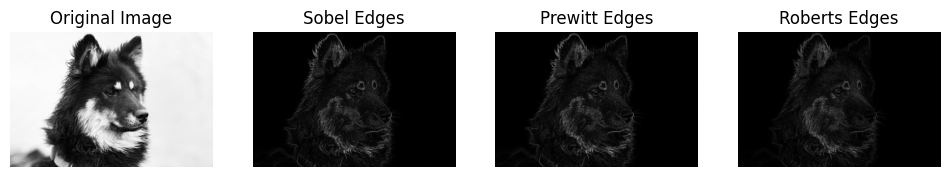

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(141), plt.imshow(image_float, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Edges'), plt.axis('off')
plt.subplot(143), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Edges'), plt.axis('off')
plt.subplot(144), plt.imshow(roberts_edges, cmap='gray'), plt.title('Roberts Edges'), plt.axis('off')
plt.show()

## LAPLACE

In [9]:
from scipy.ndimage import laplace

In [10]:
def apply_laplacian_operator(image):
    laplacian_image = laplace(image, mode='constant')
    laplacian_image = np.clip(laplacian_image, 0, 255)
    return laplacian_image

In [17]:
image_path = '/content/drive/MyDrive/Digital-Image-Processing/img8_moon.jpg'
image = np.array(Image.open(image_path).convert('L'))

In [18]:
laplacian_image = apply_laplacian_operator(image)

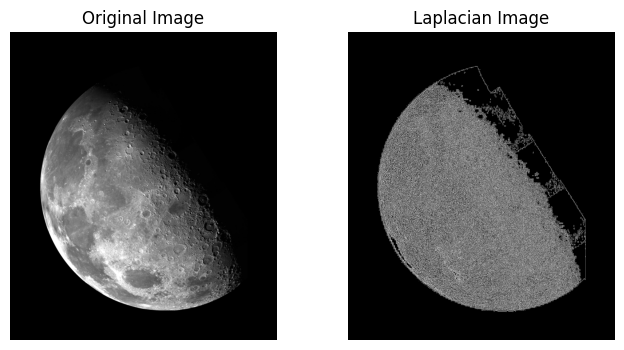

In [19]:
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(laplacian_image, cmap='gray'), plt.title('Laplacian Image'), plt.axis('off')
plt.show()

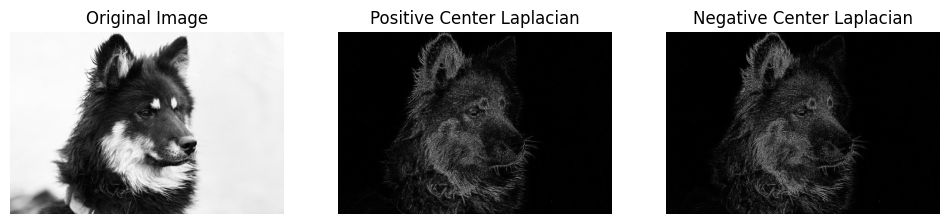

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
''' image = cv2.imread('path_to_your_image.jpg', cv2.IMREAD_GRAYSCALE) '''

# Apply the Laplacian filter with a Positive Center
''' laplacian_positive = cv2.Laplacian(image, cv2.CV_64F, ksize=3) '''
kernel_positive = np.array([[1, 1, 1],
                            [1,-8, 1],
                            [1, 1, 1]], dtype=np.float64)
laplacian_positive = cv2.filter2D(image, -1, kernel_positive)
# Apply the Laplacian filter with a custom Negative Center Kernel
kernel_negative = np.array([[-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]], dtype=np.float64)
laplacian_negative = cv2.filter2D(image, -1, kernel_negative)

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(laplacian_positive, cmap='gray'), plt.title('Positive Center Laplacian'), plt.axis('off')
plt.subplot(133), plt.imshow(laplacian_negative, cmap='gray'), plt.title('Negative Center Laplacian'), plt.axis('off')
plt.show()


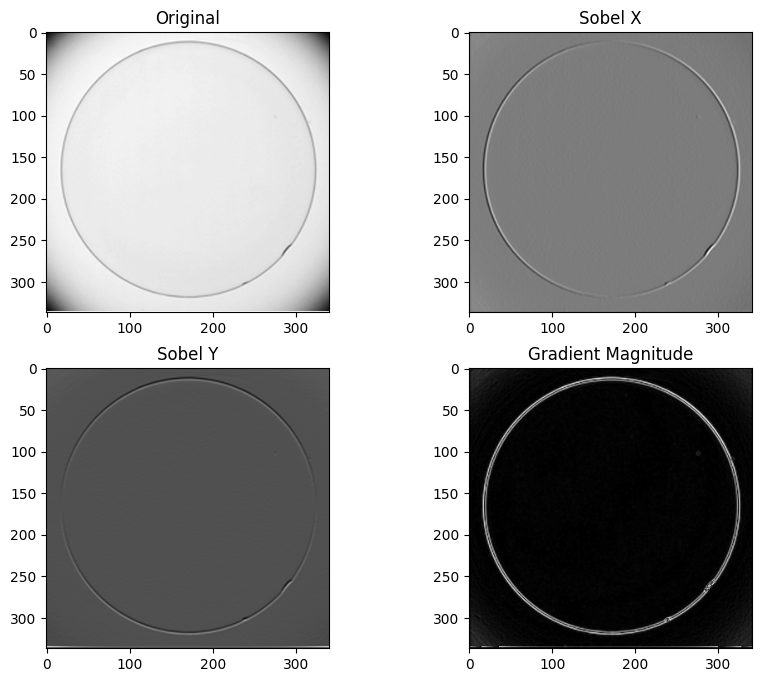

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Digital-Image-Processing/img9_optical_lens_defect.png', cv2.IMREAD_GRAYSCALE)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)   #gradient in x-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)   #gradient in y-direction

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = np.uint8(gradient_magnitude)

gradient_direction = np.arctan2(sobel_x, sobel_y)

plt.figure(figsize=(10, 8))
plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(222), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(223), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(224), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('Gradient Magnitude')
plt.show()
